In [2]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pobieranie danych dla Rejkjaviku
url1 = "https://academic.udayton.edu/kissock/http/Weather/gsod95-current/ILREYKJV.txt"
file1 = urllib.request.urlopen(url1)
dane1 = []
for line in file1:
    linia1 = line.decode("utf-8")
    dane1.append(linia1)

In [4]:
#pobieranie danych dla Sztokholmu
url2 = "https://academic.udayton.edu/kissock/http/Weather/gsod95-current/SNSTKHLM.txt"
file2 = urllib.request.urlopen(url2)
dane2 = []
for line in file2:
    linia2 = line.decode("utf-8")
    dane2.append(linia2)

In [5]:
dane1[0]

' 1             1             1995         23.9\r\n'

In [6]:
dane2[0]

' 1             1             1995         31.3\r\n'

In [7]:
#rozdzielanie poszczególnych danych dla Rejkjaviku
miesiac_R =[x.split()[0] for x in dane1]
dzien_R =[x.split()[1] for x in dane1]
rok_R =[x.split()[2] for x in dane1]
tempF_R =[x.split()[3] for x in dane1]

In [8]:
#rozdzielanie poszczególnych danych dla Sztokholmu
miesiac_Sz =[x.split()[0] for x in dane2]
dzien_Sz =[x.split()[1] for x in dane2]
rok_Sz =[x.split()[2] for x in dane2]
tempF_Sz =[x.split()[3] for x in dane2]

In [9]:
tempF_R

['23.9',
 '37.3',
 '37.4',
 '33.5',
 '32.2',
 '26.6',
 '33.5',
 '31.6',
 '29.5',
 '19.7',
 '21.7',
 '36.3',
 '27.7',
 '24.9',
 '24.4',
 '23.5',
 '21.7',
 '30.6',
 '32.4',
 '35.1',
 '35.0',
 '34.3',
 '30.2',
 '25.9',
 '22.8',
 '19.7',
 '26.2',
 '17.7',
 '26.1',
 '37.2',
 '26.3',
 '19.8',
 '32.8',
 '36.9',
 '30.8',
 '30.8',
 '25.5',
 '15.6',
 '15.2',
 '28.7',
 '29.2',
 '25.6',
 '32.8',
 '32.0',
 '27.2',
 '25.8',
 '25.7',
 '26.2',
 '32.1',
 '36.1',
 '35.0',
 '33.4',
 '30.9',
 '25.5',
 '26.7',
 '25.6',
 '26.7',
 '31.0',
 '29.5',
 '27.4',
 '27.1',
 '19.1',
 '25.3',
 '26.8',
 '27.2',
 '25.9',
 '27.4',
 '28.3',
 '27.9',
 '27.7',
 '32.8',
 '27.8',
 '24.0',
 '23.5',
 '29.8',
 '23.9',
 '22.0',
 '19.0',
 '32.7',
 '40.9',
 '39.6',
 '32.0',
 '31.0',
 '28.8',
 '23.3',
 '21.3',
 '28.4',
 '38.5',
 '40.2',
 '28.7',
 '27.1',
 '28.1',
 '24.6',
 '26.8',
 '35.9',
 '33.0',
 '36.9',
 '41.8',
 '38.4',
 '37.3',
 '38.9',
 '38.2',
 '35.9',
 '37.3',
 '39.1',
 '34.6',
 '28.5',
 '25.6',
 '28.5',
 '30.2',
 '33.0',
 

In [10]:
print(type(tempF_R[0]))

<class 'str'>


In [11]:
#funkcja zamieniająca stopnie z Fahrenheita na Celcjusza
def ConverttoCelc(tempF):
    tempC = []
    for f in tempF:
        c = ((f - 32) * 5 / 9)
        tempC.append(round(c, 2))
    return tempC

In [12]:
tempF_R = list(map(float, tempF_R))
tempF_Sz = list(map(float, tempF_Sz))

temp_R = ConverttoCelc(tempF_R)
temp_Sz = ConverttoCelc(tempF_Sz)

In [13]:
#strptime method takes strings and converts them into date objects that Python can understand.
#datetime.strptime(string, format)
# %m: Returns the month as a number, from 01 to 12.
# %d: Returns day of the month, from 1 to 31.
# %Y: Returns the year in four-digit format.

from datetime import datetime
date0 = datetime.strptime("01-01-1995", "%d-%m-%Y").date()
date1 = datetime.strptime("01-01-2001", "%d-%m-%Y").date()
date2 = datetime.strptime("31-12-2001", "%d-%m-%Y").date()

In [14]:
date0

datetime.date(1995, 1, 1)

In [15]:
#aby wziąć dane jedynie z roku 2001
roznica1 =  (date1 - date0).days
roznica2 =  (date2 - date0).days

In [16]:
len(rok_R[roznica1:roznica2+1])

365

In [17]:
dane_R = pd.DataFrame({'year': rok_R[roznica1:roznica2+1],'month': miesiac_R[roznica1:roznica2+1],
                   'day': dzien_R[roznica1:roznica2+1]})

In [18]:
dane_R

,year,month,day
0,2001,1,1
1,2001,1,2
2,2001,1,3
3,2001,1,4
4,2001,1,5
...,...,...,...
360,2001,12,27
361,2001,12,28
362,2001,12,29
363,2001,12,30


In [19]:
dane_R['year'][0]

'2001'

In [20]:
datetime_R = pd.to_datetime(dane_R)

In [21]:
datetime_R

0     2001-01-01
1     2001-01-02
2     2001-01-03
3     2001-01-04
4     2001-01-05
         ...    
360   2001-12-27
361   2001-12-28
362   2001-12-29
363   2001-12-30
364   2001-12-31
Length: 365, dtype: datetime64[ns]

In [22]:
czas =[]
for i in range(len(datetime_R)):
    czas.append(datetime_R[i])
czas

[Timestamp('2001-01-01 00:00:00'),
 Timestamp('2001-01-02 00:00:00'),
 Timestamp('2001-01-03 00:00:00'),
 Timestamp('2001-01-04 00:00:00'),
 Timestamp('2001-01-05 00:00:00'),
 Timestamp('2001-01-06 00:00:00'),
 Timestamp('2001-01-07 00:00:00'),
 Timestamp('2001-01-08 00:00:00'),
 Timestamp('2001-01-09 00:00:00'),
 Timestamp('2001-01-10 00:00:00'),
 Timestamp('2001-01-11 00:00:00'),
 Timestamp('2001-01-12 00:00:00'),
 Timestamp('2001-01-13 00:00:00'),
 Timestamp('2001-01-14 00:00:00'),
 Timestamp('2001-01-15 00:00:00'),
 Timestamp('2001-01-16 00:00:00'),
 Timestamp('2001-01-17 00:00:00'),
 Timestamp('2001-01-18 00:00:00'),
 Timestamp('2001-01-19 00:00:00'),
 Timestamp('2001-01-20 00:00:00'),
 Timestamp('2001-01-21 00:00:00'),
 Timestamp('2001-01-22 00:00:00'),
 Timestamp('2001-01-23 00:00:00'),
 Timestamp('2001-01-24 00:00:00'),
 Timestamp('2001-01-25 00:00:00'),
 Timestamp('2001-01-26 00:00:00'),
 Timestamp('2001-01-27 00:00:00'),
 Timestamp('2001-01-28 00:00:00'),
 Timestamp('2001-01-

In [23]:
#tworzenie nowej kolumny w dataframe z pełną datą
dane_R['data'] = pd.to_datetime(dane_R[{'day','month', 'year'}], format='%d-%m-%Y')

In [24]:
dane_R

,year,month,day,data
0,2001,1,1,2001-01-01
1,2001,1,2,2001-01-02
2,2001,1,3,2001-01-03
3,2001,1,4,2001-01-04
4,2001,1,5,2001-01-05
...,...,...,...,...
360,2001,12,27,2001-12-27
361,2001,12,28,2001-12-28
362,2001,12,29,2001-12-29
363,2001,12,30,2001-12-30


In [25]:
dane_Sz = pd.DataFrame({'year': rok_Sz[roznica1:roznica2+1],
                   'month': miesiac_Sz[roznica1:roznica2+1],'day': dzien_Sz[roznica1:roznica2+1]})

In [26]:
dane_Sz

,year,month,day
0,2001,1,1
1,2001,1,2
2,2001,1,3
3,2001,1,4
4,2001,1,5
...,...,...,...
360,2001,12,27
361,2001,12,28
362,2001,12,29
363,2001,12,30


In [27]:
dane_Sz['data'] = pd.to_datetime(dane_Sz[{'day','month','year'}], format='%d-%m-%Y')

dane_Sz

In [29]:
array_R = np.array(temp_R[roznica1:roznica2+1])
array_Sz = np.array(temp_Sz[roznica1:roznica2+1])
tem1 = array_R
tem2 = array_Sz
roznice = []
for i in range(len(tem1)):
    roznica = tem1[i] - tem2[i]
    if roznica < 0:
        roznica *= -1
    roznice.append(roznica)
minIndex=0
maxIndex=0
minRoznica=roznice[0]
maxRoznica=roznice[0]
for i in range(len(tem1)):
    if minRoznica>roznice[i]:
        minRoznica = roznice[i]
        minIndex=i
    elif maxRoznica<roznice[i]:
        maxRoznica = roznice[i]
        maxIndex=i
        
print(minIndex)
print(maxIndex)
print(minRoznica)
print(maxRoznica)
print(czas[minIndex])
print(czas[maxIndex])

26
356
0.0
23.22
2001-01-27 00:00:00
2001-12-23 00:00:00


In [30]:
array_R[minIndex]

1.44

In [31]:
array_Sz[minIndex]

1.44

In [32]:
array_R[maxIndex]

5.61

In [33]:
array_Sz[maxIndex]

-17.61

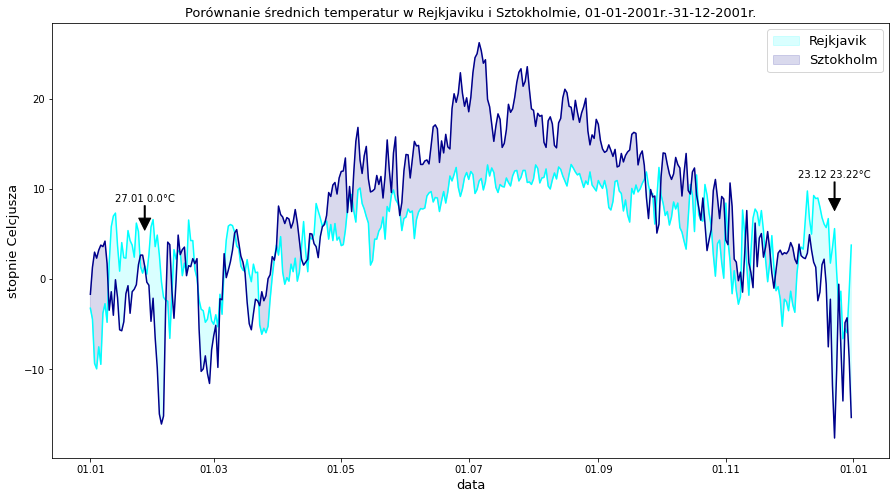

In [34]:
import matplotlib.dates as mdates

fig,ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

ax.plot(czas, array_R, color ='aqua')
ax.plot(czas, array_Sz, color ='darkblue')

ax.fill_between(czas, array_R, array_Sz, where = (array_R>array_Sz), interpolate = True, 
                color = "aqua", alpha = 0.15, label='Rejkjavik')
ax.fill_between(czas, array_R, array_Sz, where = (array_R<=array_Sz), interpolate = True, 
                color = "darkblue", alpha = 0.15, label='Sztokholm')

maxRoznica = round(maxRoznica,2)
minRoznica = round(minRoznica,2)

text1 = str(czas[maxIndex].strftime("%d.%m")) + " " + str(maxRoznica) + '°C'
text2 = str(czas[minIndex].strftime("%d.%m")) + " " + str(minRoznica) + '°C'
x1 = czas[maxIndex]
x2 = czas[minIndex]
y1max = array_R[maxIndex]
y2max = array_Sz[maxIndex]
y1min = array_R[minIndex]
y2min = array_Sz[minIndex]

if y1max > y2max:
    y1 = y1max 
else:
    y1 = y2max  
    
if y1min > y2min:
    y2 = y1min
else:
    y2 = y2min

#max
ax.annotate(text1,
            xy=(x1, y1 + 2),xytext=(0, y1 + 30),
            textcoords='offset points',
            arrowprops=dict(width = 1, facecolor='black', shrink = 5), ha = 'center', va = 'center')
#min
ax.annotate(text2,
            xy=(x2, y2 + 4),xytext=(0, y2 + 30),
            textcoords='offset points',
            arrowprops=dict(width = 1,facecolor='black', shrink = 5),ha = 'center', va = 'center')

ax.set_xlabel('data', size = 13)
ax.set_ylabel('stopnie Celcjusza', size = 13)
plt.title("Porównanie średnich temperatur w Rejkjaviku i Sztokholmie, 01-01-2001r.-31-12-2001r.", size = 13)
ax.legend(loc = 'best', prop={'size': 13})  

plt.savefig("07_mac_273344.pdf") 
plt.show()